In [1]:
!pip install -r requirements.txt
!pip install git+https://github.com/sakoho81/pyimagequalityranking.git

  Cloning https://github.com/sakoho81/pyimagequalityranking.git to c:\users\mspat\appdata\local\temp\pip-req-build-immxr7jj
  Resolved https://github.com/sakoho81/pyimagequalityranking.git to commit 094b0b9f79f7f78853a79d71be686f91491e0574
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/sakoho81/pyimagequalityranking.git 'C:\Users\mspat\AppData\Local\Temp\pip-req-build-immxr7jj'


In [2]:
!pyimq.main --mode=directory --mode=analyze --mode=plot \
--working-directory=DAPI --normalize-power --result=fstd

Mode option is ['directory', 'analyze', 'plot']
Done analyzing DAPI_20230206_B2-10_01.tif
Done analyzing DAPI_20230206_B2-11_01.tif
Done analyzing DAPI_20230206_B2-12_01.tif
Done analyzing DAPI_20230206_B2-13_01.tif
Done analyzing DAPI_20230206_B2-14_01.tif
Done analyzing DAPI_20230206_B2-15_01.tif
Done analyzing DAPI_20230206_B2-16_01.tif
Done analyzing DAPI_20230206_B2-1_01.tif
Done analyzing DAPI_20230206_B2-2_01.tif
Done analyzing DAPI_20230206_B2-3_01.tif
Done analyzing DAPI_20230206_B2-4_01.tif
Done analyzing DAPI_20230206_B2-5_01.tif
Done analyzing DAPI_20230206_B2-6_01.tif
Done analyzing DAPI_20230206_B2-7_01.tif
Done analyzing DAPI_20230206_B2-8_01.tif
Done analyzing DAPI_20230206_B2-9_01.tif
Done analyzing DAPI_20230206_B3-10_01.tif
Done analyzing DAPI_20230206_B3-11_01.tif
Done analyzing DAPI_20230206_B3-12_01.tif
Done analyzing DAPI_20230206_B3-13_01.tif
Done analyzing DAPI_20230206_B3-14_01.tif
Done analyzing DAPI_20230206_B3-15_01.tif
Done analyzing DAPI_20230206_B3-16_01

In [3]:
import pandas as pd
import seaborn as sns

In [5]:
imaq_4h=pd.read_csv('DAPI/2023-02-07_PyIQ_output/19-46-34_PyIQ_analyze_out.csv')
imaq_4h.tail()

,Filename,tEntropy,tBrenner,fMoments,fMean,fSTD,fEntropy,fTh,fMaxPw,Skew,...,SpectMean,SpectSTDNorm,InvSpectSTDNorm,SpectEntNorm,SkewNorm,KurtosisNorm,SpectHighPowerNorm,MeanBinNorm,BrennerNorm,SpectMomentsNorm
283,DAPI\DAPI_20230206_C3-14_01.tif,0.808019,2233553.0,2.355628,120.691571,1.537779,5.103943,2.273333e+09,120.017204,0.190923,...,0.162714,0.006151,0.993849,0.982634,0.905824,0.017549,0.231793,0.084746,0.025934,0.033503
284,DAPI\DAPI_20230206_B3-9_01.tif,1.055600,2091216.0,1.765956,117.583709,1.479617,4.498030,2.270810e+09,117.343417,0.693759,...,0.158524,0.005918,0.994082,0.865981,0.657793,0.475757,0.226629,0.082826,0.024281,0.025116
285,DAPI\DAPI_20230206_B3-15_01.tif,1.019646,2033530.0,2.418509,121.871892,1.381262,4.981104,2.273333e+09,121.359782,0.157399,...,0.164305,0.005525,0.994475,0.958985,0.922361,0.046239,0.234386,0.086000,0.023611,0.034397
286,DAPI\DAPI_20230206_B3-14_01.tif,0.658557,1870441.0,0.796366,119.792654,1.370903,4.725406,2.273333e+09,119.331079,0.158104,...,0.161502,0.005483,0.994517,0.909757,0.922013,0.102225,0.230468,0.083296,0.021717,0.011326
287,DAPI\DAPI_20230206_B2-3_01.tif,0.951358,2184912.0,1.863879,114.887177,1.366563,5.142642,2.273333e+09,114.449635,0.042806,...,0.154889,0.005466,0.994534,0.990085,0.978885,0.036725,0.221040,0.079870,0.025369,0.026509


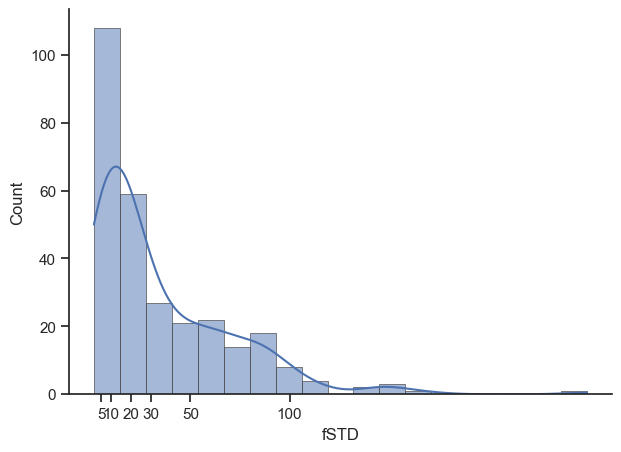

In [6]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    data=imaq_4h, 
    x="fSTD", 
    kde=True,
    edgecolor=".3",
    linewidth=.5,
)
# ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([5, 10, 20, 30, 50, 100])

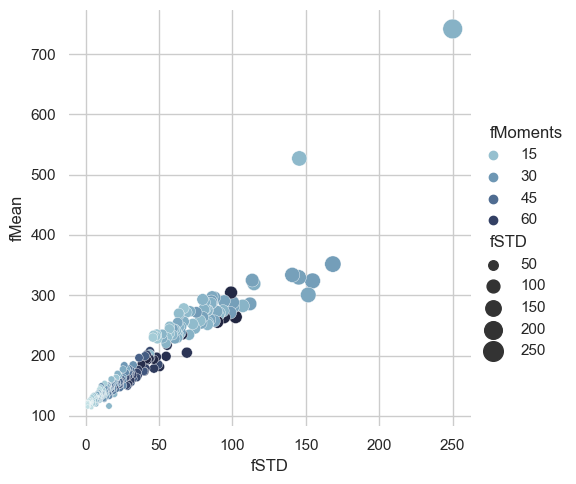

In [10]:
sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=imaq_4h,
    x="fSTD", y="fMean",
    hue="fMoments", size="fSTD",
    palette=cmap, sizes=(10, 200),
)
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [7]:
imaq_4h_sel=imaq_4h[imaq_4h['fSTD']<3]

In [8]:
imaq_4h_sel.Filename.count()

23

In [11]:
imaq_4h_sel.to_csv('DAPI_20230206_CHOK1_HeLa_24h_filterOut.csv', sep=";") 